In [24]:
import numpy as np
import pandas as pd

from causalml.dataset import make_uplift_classification
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.metrics import plot_gain

from sklearn.model_selection import train_test_split
import causalml

In [9]:
df, x_names = make_uplift_classification()

In [10]:
df.head()

,treatment_group_key,x1_informative,x2_informative,x3_informative,x4_informative,x5_informative,x6_irrelevant,x7_irrelevant,x8_irrelevant,x9_irrelevant,x10_irrelevant,x11_uplift_increase,x12_uplift_increase,x13_increase_mix,x14_uplift_increase,x15_uplift_increase,x16_increase_mix,x17_uplift_increase,x18_uplift_increase,x19_increase_mix,conversion,treatment_effect
0,control,-0.542888,1.976361,-0.531359,-2.354211,-0.380629,-2.614321,-0.128893,0.448689,-2.275192,-0.934969,0.656869,-1.315304,0.742654,1.891699,-2.428395,1.541875,-0.817705,-0.610194,-0.591581,0,0
1,treatment3,0.258654,0.552412,1.434239,-1.422311,0.089131,0.790293,1.159513,1.578868,0.166540,-0.356051,1.050526,-1.391878,-0.623243,2.443972,-2.889253,2.018585,-1.109296,-0.380362,-1.667606,0,0
2,treatment1,1.697012,-2.762600,-0.662874,-1.682340,1.217443,0.837982,1.042981,0.177398,-0.112409,1.374859,1.072329,-1.132497,1.050179,1.573054,-1.788427,1.341609,-0.749227,-2.091521,-0.471386,0,0
3,treatment2,-1.441644,1.823648,0.789423,-0.295398,0.718509,-0.492993,0.947824,-1.307887,0.123340,-1.957101,1.398966,-2.084619,0.058481,1.369439,0.422538,1.087176,-0.966666,-1.785592,-1.268379,1,1
4,control,-0.625074,3.002388,-0.096288,1.938235,3.392424,-0.465860,-0.919897,-1.072592,-1.331181,-0.824105,1.398327,-1.403984,0.760430,1.917635,-2.347675,1.560946,-0.833067,-1.407884,-0.781343,0,0


In [11]:
# Look at the conversion rate and sample size in each group
df.pivot_table(values='conversion',
               index='treatment_group_key',
               aggfunc=[np.mean, np.size],
               margins=True)

,mean,size
,conversion,conversion
treatment_group_key,,
control,0.511,1000
treatment1,0.514,1000
treatment2,0.559,1000
treatment3,0.600,1000
All,0.546,4000


In [12]:
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True)

In [14]:
df_train.shape

(3200, 22)

In [15]:
df_test.shape

(800, 22)

In [20]:
clf = UpliftTreeClassifier(control_name='control')
clf.fit(df_train[x_names].values,
        treatment=df_train['treatment_group_key'].values,
        y=df_train['conversion'].values)
p = clf.predict(df_test[x_names].values)
df_res = pd.DataFrame(p, columns=clf.classes_)
df_res.head(10)

,control,treatment1,treatment2,treatment3
0,0.561966,0.500000,0.565996,0.501114
1,0.561966,0.500000,0.565996,0.501114
2,0.561966,0.500000,0.565996,0.501114
3,0.561966,0.500000,0.565996,0.501114
4,0.561966,0.500000,0.565996,0.501114
5,0.561966,0.500000,0.565996,0.501114
6,0.561966,0.500000,0.565996,0.501114
7,0.428571,0.567568,0.548837,0.901163
8,0.561966,0.500000,0.565996,0.501114
9,0.406250,0.495868,0.570175,0.529915


In [21]:
p

array([[0.56196581, 0.5       , 0.56599553, 0.50111359],
       [0.56196581, 0.5       , 0.56599553, 0.50111359],
       [0.56196581, 0.5       , 0.56599553, 0.50111359],
       ...,
       [0.56196581, 0.5       , 0.56599553, 0.50111359],
       [0.40625   , 0.49586777, 0.57017544, 0.52991453],
       [0.40625   , 0.49586777, 0.57017544, 0.52991453]])

In [26]:
uplift_model = UpliftRandomForestClassifier(control_name='control')
uplift_model.fit(df_train[x_names].values,
                treatment=df_train['treatment_group_key'].values,
                y=df_train['conversion'].values)
df_res = uplift_model.predict(df_test[x_names].values, full_output=True)
print(df_res.shape)
df_res.head()

(800, 9)


,control,treatment1,treatment2,treatment3,recommended_treatment,delta_treatment1,delta_treatment2,delta_treatment3,max_delta
0,0.524583,0.566932,0.669655,0.554885,2,0.042349,0.145072,0.030302,0.145072
1,0.556276,0.592552,0.654894,0.579708,2,0.036276,0.098618,0.023432,0.098618
2,0.585580,0.501650,0.588084,0.504918,2,-0.083931,0.002504,-0.080663,0.002504
3,0.640731,0.551267,0.609548,0.577147,0,-0.089464,-0.031183,-0.063584,-0.031183
4,0.649776,0.559619,0.618346,0.588300,0,-0.090157,-0.031430,-0.061476,-0.031430


In [29]:
df_train.head()

,treatment_group_key,x1_informative,x2_informative,x3_informative,x4_informative,x5_informative,x6_irrelevant,x7_irrelevant,x8_irrelevant,x9_irrelevant,x10_irrelevant,x11_uplift_increase,x12_uplift_increase,x13_increase_mix,x14_uplift_increase,x15_uplift_increase,x16_increase_mix,x17_uplift_increase,x18_uplift_increase,x19_increase_mix,conversion,treatment_effect
3148,control,0.278747,-0.709869,-0.141162,-0.222318,-1.653093,0.983599,-1.024137,-0.437639,0.179778,-0.286704,1.128796,0.012417,0.664150,1.148832,0.706485,0.953221,-0.939912,-0.763504,-0.868499,0,0
198,treatment2,-0.704945,1.153419,-0.712116,-1.039151,0.290698,0.298121,0.319189,-0.778158,0.953545,-0.034742,0.767078,-0.940132,0.939889,1.480354,-1.692906,1.198847,-0.812737,-1.851027,-0.514133,0,0
513,treatment2,1.289436,0.316849,-0.028579,-1.420985,2.061552,-0.498452,-0.574361,-0.363292,0.701274,1.462909,1.067967,-1.561648,0.545127,0.565560,-0.554313,0.501147,-0.805945,-1.899330,-0.781826,0,0
2886,treatment3,-0.485071,-2.029088,1.312174,-1.378584,1.826835,-1.078153,0.279934,-0.588282,0.230220,-1.720775,1.385300,-0.819932,-0.362683,0.441811,-0.057011,0.350194,-1.215532,-1.003078,-1.723177,0,0
2504,treatment3,-0.517808,0.700939,0.134736,2.875505,3.994813,-1.098092,0.886720,-1.232687,0.718018,-0.845247,1.156615,-3.581242,0.459006,1.270856,-1.057386,1.031605,-0.841888,-1.306969,-0.882761,0,0


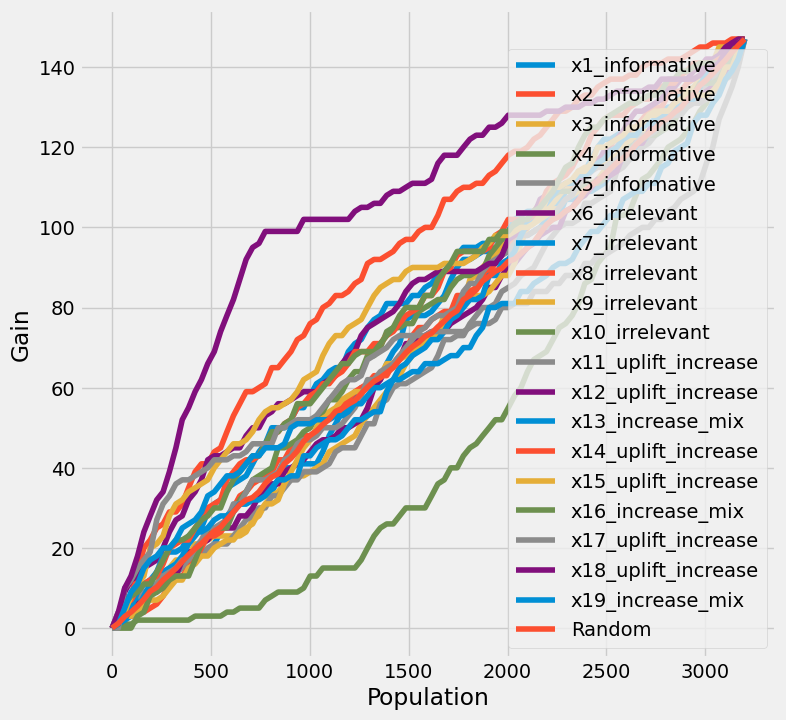

In [31]:
plot_gain(df_train, outcome_col='conversion', 
          treatment_col='treatment_group_key', 
          treatment_effect_col='treatment_effect')